In [31]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

In [32]:
# Importing dataset
bank_mk_df = pd.read_csv('Bank Marketing.csv')

In [33]:
bank_mk_df.shape

(45211, 17)

In [34]:
bank_mk_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [35]:
bank_mk_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [36]:
bank_mk_df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0


In [37]:
# Dropping Unknown values from job feature
bank_mk_df.drop(bank_mk_df[bank_mk_df['job'] == 'unknown'].index,inplace=True)
bank_mk_df.shape

(44923, 17)

In [38]:
# Renaming the target variable
bank_mk_df.rename(columns={"y": "target_outcome"}, inplace=True)

In [39]:
# Age bins 
# np.sort(bank_mk_df['age'].unique())
age_bins = [17,20,30,40,50,60,70,80,90,100]
labels = ['18-20','20-30','30-40','40-50','50-60','60-70','70-80','80-90','90-100']
bank_mk_df['agegroup'] = pd.cut(bank_mk_df['age'], bins=age_bins,labels=labels)
bank_mk_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target_outcome,agegroup
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,50-60
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,40-50
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,30-40
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,40-50
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,30-40


In [40]:
bank_mk_df['campaign'].sort_values().unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 41, 43, 44, 46, 50, 51, 55, 58, 63],
      dtype=int64)

In [41]:
# days bin
day_bins = [0,5,10,15,20,25,30,35]
labels = ['1-5','5-10','10-15','15-20','20-25','25-30','30-35']
bank_mk_df['daygroup'] = pd.cut(bank_mk_df['day'], bins=day_bins,labels=labels)
bank_mk_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target_outcome,agegroup,daygroup
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,50-60,1-5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,40-50,1-5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,30-40,1-5
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,40-50,1-5
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,30-40,1-5


In [42]:
# Number of contacts during the campaign bin
contacts_bins = [0,10,20,30,40,50,60,70]
labels = ['1-10','10-20','20-30','30-40','40-50','50-60','60-70']
bank_mk_df['noclientcontacts'] = pd.cut(bank_mk_df['campaign'], bins=contacts_bins,labels=labels)
bank_mk_df.head()
# bank_mk_df['campaign'].unique()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target_outcome,agegroup,daygroup,noclientcontacts
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,50-60,1-5,1-10
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,40-50,1-5,1-10
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,30-40,1-5,1-10
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,40-50,1-5,1-10
5,35,management,married,tertiary,no,231,yes,no,unknown,5,may,139,1,-1,0,unknown,no,30-40,1-5,1-10


In [43]:
bank_mk_df['previous'].unique()

array([  0,   3,   1,   4,   2,  11,  16,   6,   5,  10,  12,   7,  18,
         9,  21,   8,  14,  15,  26,  37,  13,  25,  20,  27,  17,  23,
        38,  29,  24,  51, 275,  22,  19,  30,  58,  28,  32,  40,  55,
        35,  41], dtype=int64)

In [44]:
bank_mk_df.isna().sum()

age                 0
job                 0
marital             0
education           0
default             0
balance             0
housing             0
loan                0
contact             0
day                 0
month               0
duration            0
campaign            0
pdays               0
previous            0
poutcome            0
target_outcome      0
agegroup            0
daygroup            0
noclientcontacts    0
dtype: int64

In [45]:
bank_mk_df[bank_mk_df.duplicated(keep='last')]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,target_outcome,agegroup,daygroup,noclientcontacts


In [46]:
bank_mk_df['target_outcome'].value_counts()

no     39668
yes     5255
Name: target_outcome, dtype: int64

In [47]:
# Data Visualization

<AxesSubplot:xlabel='target_outcome', ylabel='count'>

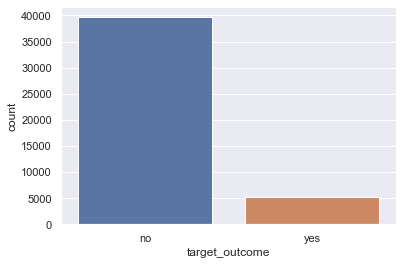

In [48]:
# Imbalanced dataset
sns.set_theme(style='darkgrid',palette='deep')
sns.countplot(x = bank_mk_df['target_outcome'])

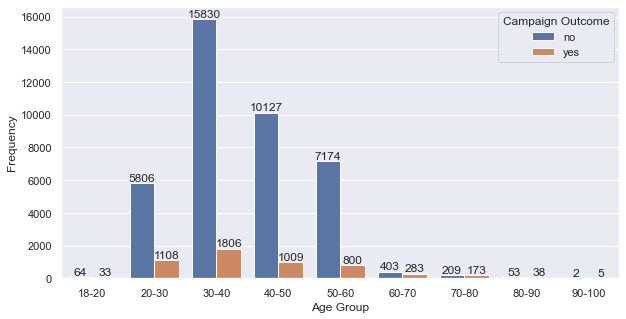

In [49]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x=bank_mk_df['agegroup'],hue=bank_mk_df['target_outcome'])
ax.set_xlabel('Age Group')
ax.set_ylabel('Frequency')
ax.legend(title='Campaign Outcome')
for container in ax.containers:
    ax.bar_label(container)

In [ ]:
# Group the data by month and campaign outcome
grouped_data = bank_mk_df.groupby(['month', 'target_outcome'])['target_outcome'].count().reset_index(name='count')

# Create a pivot table with counts of successful and unsuccessful campaigns by month
pivot_table = grouped_data.pivot(index='month', columns='target_outcome', values='count')

# Create a stacked bar chart
pivot_table.plot(kind='bar', stacked=True, color=['#1f77b4', '#ff7f0e'])

# Add chart labels
plt.title('Count of Successful and Unsuccessful Campaigns by Month')
plt.xlabel('Month')
plt.ylabel('Count')
plt.legend(title='Campaign Outcome', loc='upper right')

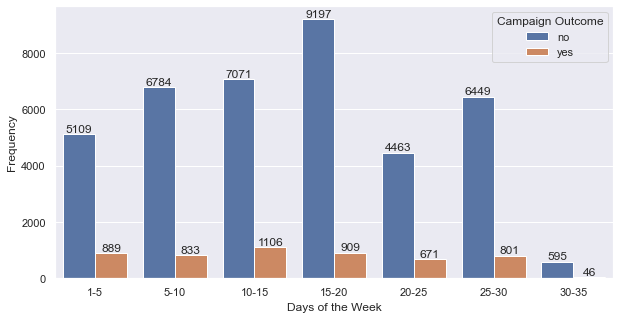

In [50]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x=bank_mk_df['daygroup'],hue=bank_mk_df['target_outcome'])
ax.set_xlabel('Days of the Week')
ax.set_ylabel('Frequency')
ax.legend(title='Campaign Outcome')
for container in ax.containers:
    ax.bar_label(container)

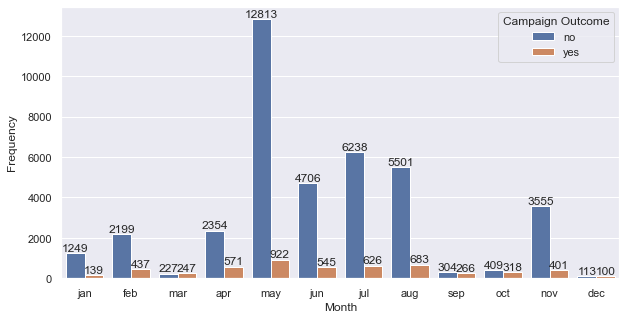

In [51]:
plt.figure(figsize=(10,5))
Months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
ax = sns.countplot(x=bank_mk_df['month'],hue=bank_mk_df['target_outcome'],order=Months)
ax.set_xlabel('Month')
ax.set_ylabel('Frequency')
ax.legend(title='Campaign Outcome')
for container in ax.containers:
    ax.bar_label(container)

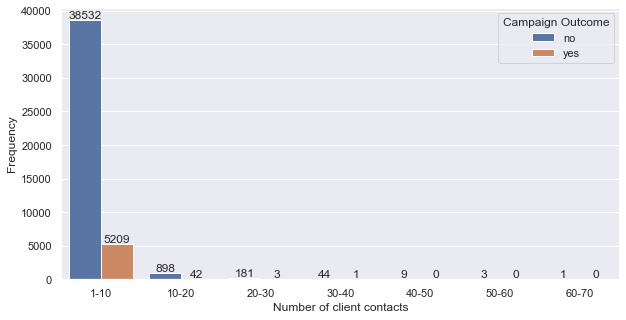

In [52]:
plt.figure(figsize=(10,5))
ax = sns.countplot(x=bank_mk_df['noclientcontacts'],hue=bank_mk_df['target_outcome'])
ax.set_xlabel('Number of client contacts')
ax.set_ylabel('Frequency')
ax.legend(title='Campaign Outcome',loc='upper right')
for container in ax.containers:
    ax.bar_label(container)

<AxesSubplot:xlabel='month', ylabel='duration'>

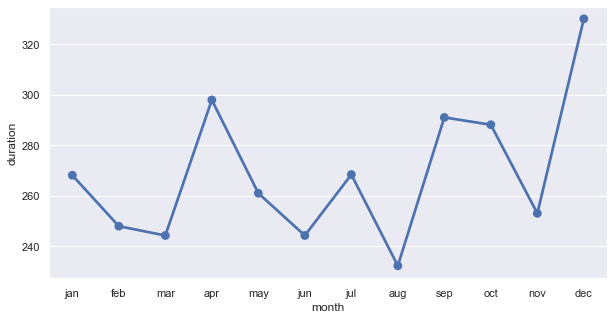

In [53]:
plt.figure(figsize=(10,5))
Months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
sns.pointplot(data=bank_mk_df, x="month", y="duration",ci=False,order=Months)

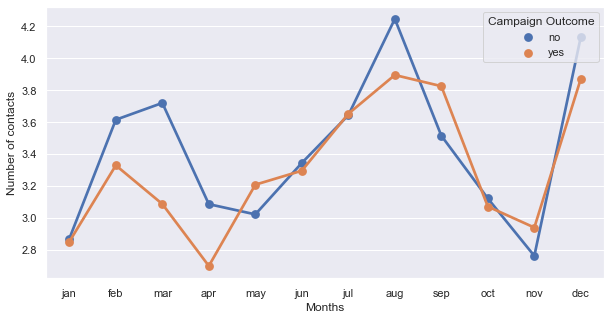

In [54]:
plt.figure(figsize=(10,5))
Months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
bank_mk_df['totalcontacts'] = bank_mk_df['previous'] + bank_mk_df['campaign']
ax = sns.pointplot(data=bank_mk_df, x="month", y="totalcontacts",ci=False,order=Months,hue="target_outcome")
ax.set_xlabel('Months')
ax.set_ylabel('Number of contacts')
ax.legend(title='Campaign Outcome',loc='upper right')

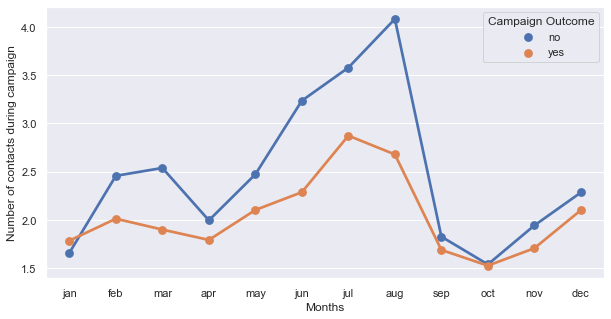

In [55]:
plt.figure(figsize=(10,5))
Months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
ax = sns.pointplot(data=bank_mk_df, x="month", y="campaign",ci=False,order=Months,hue="target_outcome")
ax.set_xlabel('Months')
ax.set_ylabel('Number of contacts during campaign')
ax.legend(title='Campaign Outcome',loc='upper right')

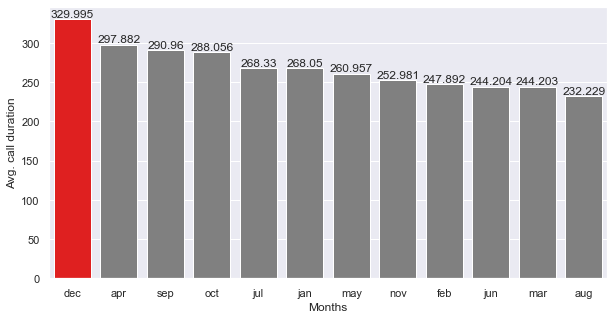

In [56]:
plt.figure(figsize=(10,5))
Months = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul', 'aug', 'sep', 'oct', 'nov', 'dec']
month_duration = bank_mk_df.groupby('month')['duration'].mean().sort_values(ascending=False).reset_index()
cols = ['grey' if (x < max(month_duration['duration'])) else 'red' for x in month_duration['duration']]
ax = sns.barplot(x=month_duration['month'],y=month_duration['duration'],ci=False,palette=cols)
ax.set_xlabel('Months')
ax.set_ylabel('Avg. call duration')
for container in ax.containers:
    ax.bar_label(container)

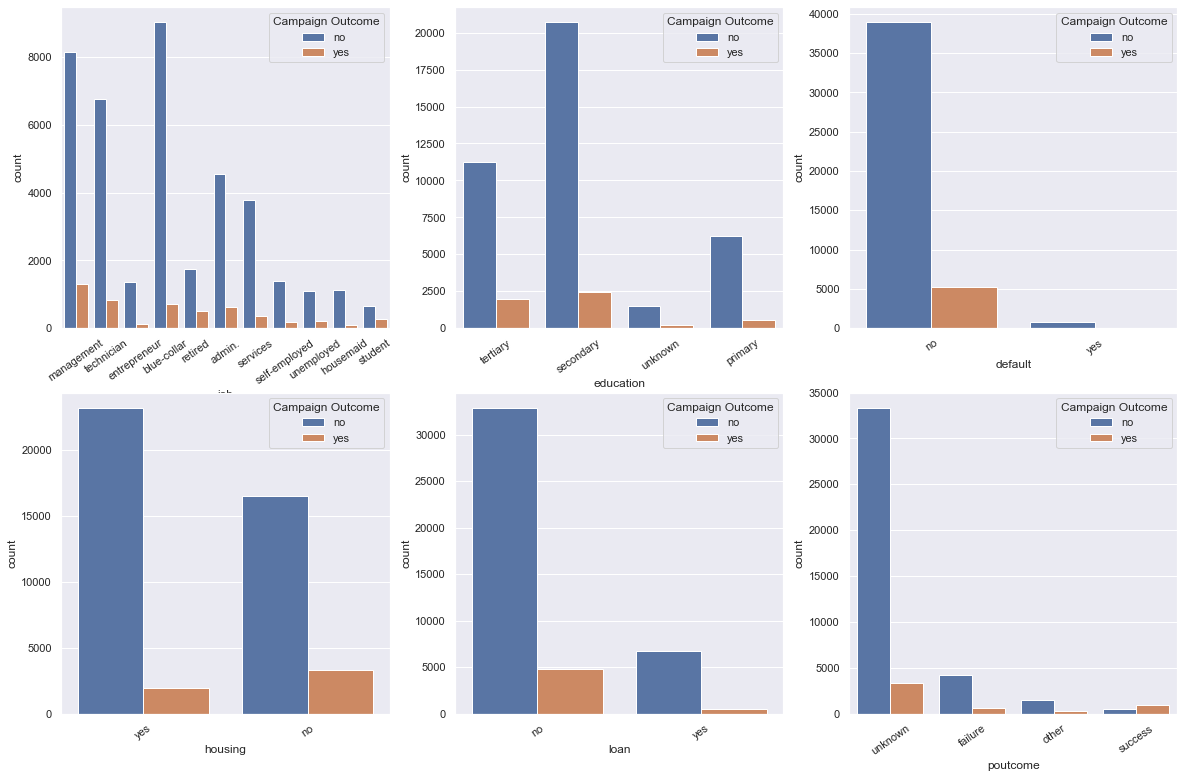

In [57]:
figure_cat = plt.figure(figsize=(20,13))
for ind,col in enumerate(['job','education','default','housing','loan','poutcome']):
    ax = figure_cat.add_subplot(2,3,ind+1)
    sns.countplot(x=col,hue='target_outcome',data=bank_mk_df)
    plt.legend(title='Campaign Outcome',loc='upper right')
    plt.xticks(rotation=35)

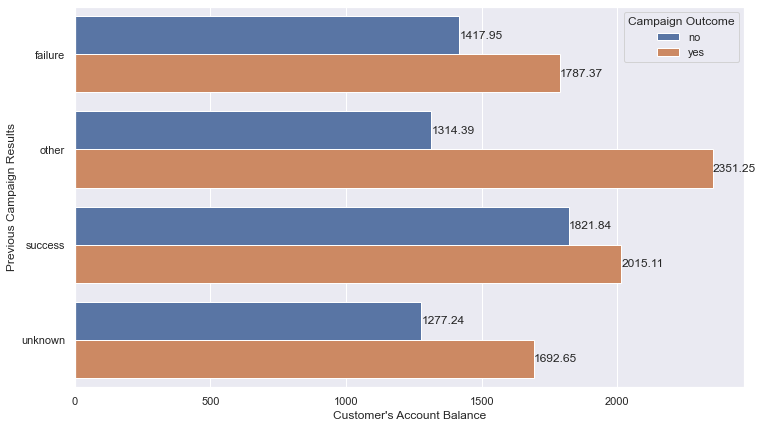

In [58]:
plt.figure(figsize=(12,7))
previous_outcome_balance = bank_mk_df.groupby(['target_outcome','poutcome']).agg({'balance':'mean'}).reset_index()
ax = sns.barplot(y=previous_outcome_balance['poutcome'],x=previous_outcome_balance['balance'],ci=False,hue=previous_outcome_balance['target_outcome'])
ax.set_ylabel("Previous Campaign Results")
ax.set_xlabel("Customer's Account Balance")
ax.legend(title='Campaign Outcome',loc='upper right')
for container in ax.containers:
    ax.bar_label(container)

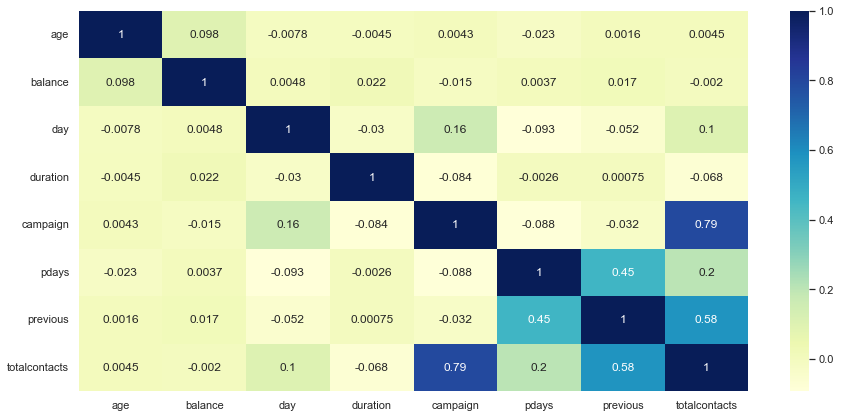

In [59]:
# Correlation - Heat Map
plt.figure(figsize=(15,7))
sns.heatmap(bank_mk_df.corr(method='pearson'),annot = True, cmap="YlGnBu");

In [60]:
# from operator import add
# def find_anomalies(data):
#     '''
#         The function is used to find anomalies in the data structure. 
#         parameters - data frame
#         returns - data structure
#     ''' 
    
#     for col in data:
#         Q1 = np.percentile(data[col], 25,
#                 interpolation = 'midpoint')
 
#         Q3 = np.percentile(data[col], 75,
#                         interpolation = 'midpoint')
#         IQR = Q3 - Q1
        
#         print('Col:',col)
        
#         print('Q1:',Q1,'Q3:',Q3,'IQR:',IQR)

#         upper = np.where(data[col] >= (Q3+1.5*IQR))

#         lower = np.where(data[col] <= (Q1-1.5*IQR))

#         print(lower[0])
#         print(upper[0])
        
#         try:
#             if len(lower[0]) != 0 and len(lower[0]) > 0:
#                 for low_val in lower[0]:
#                     data.iloc[low_val].loc[[col]].values[0] = Q1
#             if len(upper[0]) != 0 and len(upper[0]) > 0:
#                 for up_val in upper[0]:
#                     data.iloc[up_val].loc[[col]].values[0] = Q3
#         except:
#             pass
# #     print(list(set(anomalies)))
    
#     return data
    

In [13]:
# find_anomalies(bank_mk_df.select_dtypes(include='int'))

Col: age
Q1: 33.0 Q3: 48.0 IQR: 15.0
[]
[29158 29261 29263 29322 29865 30225 30264 30908 31051 31052 31055 31057
 31069 31077 31089 31099 31101 31108 31116 31125 31130 31145 31149 31151
 31183 31189 31233 31255 31261 31285 31341 31365 31383 31393 31395 31414
 31447 31527 31569 31647 31723 31816 32009 32032 32064 32068 32074 32089
 32105 32160 32204 32321 32451 32689 32699 32802 33017 33360 33414 33455
 33699 33706 33710 33719 33729 33751 33752 33766 33775 33777 33780 33803
 33810 33811 33815 33827 33846 33860 34128 40363 40367 40368 40374 40381
 40383 40389 40401 40402 40412 40471 40481 40515 40524 40526 40538 40561
 40569 40571 40584 40586 40595 40621 40645 40655 40657 40674 40676 40688
 40699 40702 40710 40712 40726 40732 40759 40766 40786 40789 40792 40816
 40837 40838 40843 40851 40864 40872 40896 40910 40913 40932 40947 40954
 40957 40972 40978 40987 40988 41007 41036 41069 41099 41101 41104 41129
 41136 41162 41171 41179 41183 41197 41237 41242 41257 41258 41290 41291
 41294 4133

,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0
...,...,...,...,...,...,...,...
45206,51,825,17,977,3,-1,0
45207,71,1729,17,456,2,-1,0
45208,72,5715,17,1127,5,184,3
45209,57,668,17,508,4,-1,0


In [83]:
bank_mk_df['education'].value_counts()

secondary    23131
tertiary     13262
primary       6800
unknown       1730
Name: education, dtype: int64

# Label Encoding and One Hot Encoding

In [61]:
from sklearn.preprocessing import LabelEncoder
def get_dummies(data):
    
    '''
        The get dummies function returns data structure with dummies created on the columns of type object
        Parameter - dataframe,
        returns - dataframe
        Columns with unique values greater than 5 will be labelencoded, and others will be onehot encoded
    '''
    val_grt = []
    val_less = []
    
    for cols in data.select_dtypes(include='object'):
        if cols in ['education','month','target_outcome','housing','default','loan']:
            val_grt.append(cols) 
            print('Col1',cols)
        else:
            val_less.append(cols)
            print('Col2',cols)
            
    # One Hot Encoding        
    one_hot = pd.get_dummies(data[val_less], drop_first=True)
    new_data = pd.concat([data, one_hot], axis = 1)
    new_data.drop(data[val_less], axis = 1, inplace = True)
    
    # Label Encoding
    for feature in val_grt:
        labelencoder = LabelEncoder()
        new_data[feature] = labelencoder.fit_transform(new_data[feature])
    
    return new_data
    

In [62]:
new_bank_mk_df = get_dummies(bank_mk_df)

Col2 job
Col2 marital
Col1 education
Col1 default
Col1 housing
Col1 loan
Col2 contact
Col1 month
Col2 poutcome
Col1 target_outcome


In [63]:
new_bank_mk_df['education'].value_counts()

1    23131
2    13262
0     6800
3     1730
Name: education, dtype: int64

In [64]:
new_bank_mk_df.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'target_outcome',
       'agegroup', 'daygroup', 'noclientcontacts', 'totalcontacts',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'contact_telephone', 'contact_unknown',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

In [65]:
# Dropping Unknown Columns
new_bank_mk_df.drop(['totalcontacts','agegroup','daygroup','noclientcontacts'],axis=1,inplace=True)

In [66]:
new_bank_mk_df.columns

Index(['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
       'month', 'duration', 'campaign', 'pdays', 'previous', 'target_outcome',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed', 'job_services',
       'job_student', 'job_technician', 'job_unemployed', 'marital_married',
       'marital_single', 'contact_telephone', 'contact_unknown',
       'poutcome_other', 'poutcome_success', 'poutcome_unknown'],
      dtype='object')

# Training and Testing data split

In [67]:
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import classification_report, confusion_matrix,roc_curve,roc_auc_score
import time

In [68]:
# scaler = StandardScaler()
# scaler.fit(new_bank_mk_df.drop('target_outcome',axis=1))
# scaled_features = scaler.transform(new_bank_mk_df.drop('target_outcome',axis=1))

In [69]:
# new_bank_mk_df_scaled = pd.DataFrame(scaled_features,columns=['age', 'education', 'default', 'balance', 'housing', 'loan', 'day',
#                                                                'month', 'duration', 'campaign', 'pdays', 'previous',
#                                                                'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
#                                                                'job_management', 'job_retired', 'job_self-employed', 'job_services',
#                                                                'job_student', 'job_technician', 'job_unemployed', 'marital_married',
#                                                                'marital_single', 'contact_telephone', 'contact_unknown',
#                                                                'poutcome_other', 'poutcome_success', 'poutcome_unknown'])
# new_bank_mk_df_scaled.head()

In [70]:
from sklearn.model_selection import train_test_split
def data_split(data,trgt_col_name):
    
    '''
        The function creates a training and testing data split from the dataframe. The ratio is 70:30. 
        parameters - dataframe and target column name
        return - train and test split values
    '''
    # Creating X variable - all features except dependent variable
    X = data.drop([trgt_col_name],axis=1)
     # Creating X variable - dependent variable
    y = data[trgt_col_name]
    
    return  train_test_split(X, y, test_size=0.3, random_state=369)
    

In [71]:
# Data Split method invocation 
X_train, X_test, y_train, y_test = data_split(new_bank_mk_df,'target_outcome')

In [72]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(31446, 29) (13477, 29) (31446,) (13477,)


In [73]:
# X = new_bank_mk_df.drop(['target_outcome','agegroup','daygroup','noclientcontacts'],axis=1)
# y = new_bank_mk_df['target_outcome']

In [74]:
# y.value_counts()

In [75]:
# from sklearn.model_selection import train_test_split
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=369)

# SMOTE Oversampling

In [76]:
from collections import Counter
from imblearn.combine import SMOTETomek

In [77]:
res_smt = SMOTETomek(sampling_strategy='not majority',random_state=369)
X_train_res, y_train_res = res_smt.fit_resample(X_train, y_train)
print('Resampled %s' % Counter(y_train_res))

Resampled Counter({0: 27100, 1: 27100})


In [149]:

# pca_feature = PCA(n_components = 7)
 
# X_train_fs = pca_feature.fit_transform(X_train_scale)
# X_test_fs = pca_feature.transform(X_test_scale)
 
# explained_variance = pca_feature.explained_variance_ratio_

# print("Explained Variance: %s" %explained_variance) 
# print("Components:",pca_feature.components_)

# Logistic Regression

# Feature Selection

In [194]:
# Stepwise feature selection
sfs_md_logit = SFS(LogisticRegression(solver='lbfgs',class_weight='balanced'),
          k_features=(5,10),
          forward=True,
          floating=True,
          scoring = 'accuracy',
          cv = 5)

In [195]:
sfs_md_logit.fit(X_train_res,y_train_res)

SequentialFeatureSelector(estimator=LogisticRegression(class_weight='balanced'),
                          floating=True, k_features=(5, 10),
                          scoring='accuracy')

In [196]:
sfs_md_logit.k_feature_names_

('housing',
 'loan',
 'duration',
 'campaign',
 'pdays',
 'job_blue-collar',
 'job_services',
 'job_technician',
 'contact_unknown',
 'poutcome_success')

In [198]:
pd.DataFrame.from_dict(sfs_md_logit.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(8,)","[0.7184501845018451, 0.7122693726937269, 0.718...",0.715996,"(duration,)",0.003324,0.002586,0.001293
2,"(4, 8)","[0.7733394833948339, 0.8024907749077491, 0.806...",0.79893,"(housing, duration)",0.016677,0.012975,0.006488
3,"(4, 8, 25)","[0.7918819188191882, 0.8382841328413284, 0.833...",0.827085,"(housing, duration, contact_unknown)",0.022702,0.017663,0.008831
4,"(4, 5, 8, 25)","[0.7981549815498155, 0.8575645756457565, 0.851...",0.843247,"(housing, loan, duration, contact_unknown)",0.029102,0.022642,0.011321
5,"(4, 5, 8, 9, 25)","[0.7982472324723248, 0.8664206642066421, 0.860...",0.850498,"(housing, loan, duration, campaign, contact_un...",0.033678,0.026203,0.013101
6,"(4, 5, 8, 9, 25, 27)","[0.8115313653136531, 0.8697416974169742, 0.866...",0.857638,"(housing, loan, duration, campaign, contact_un...",0.029693,0.023102,0.011551
7,"(4, 5, 8, 9, 12, 25, 27)","[0.8078413284132842, 0.8767527675276753, 0.873...",0.861642,"(housing, loan, duration, campaign, job_blue-c...",0.034612,0.026929,0.013465
8,"(4, 5, 8, 9, 12, 18, 25, 27)","[0.8000922509225092, 0.8791512915129152, 0.877...",0.86297,"(housing, loan, duration, campaign, job_blue-c...",0.040443,0.031466,0.015733
9,"(4, 5, 8, 9, 10, 12, 18, 25, 27)","[0.8056273062730628, 0.8808118081180811, 0.880...",0.865904,"(housing, loan, duration, campaign, pdays, job...",0.038737,0.030139,0.015069
10,"(4, 5, 8, 9, 10, 12, 18, 20, 25, 27)","[0.7944649446494465, 0.8894833948339483, 0.885...",0.868635,"(housing, loan, duration, campaign, pdays, job...",0.047752,0.037152,0.018576


# Get training feature selected data

In [87]:
def training_fs_data(feature_names):
    
    ''' Function creates the training feature selected values for the given model
        parameter - feature names tuple
        returns training data
    '''
       
    fs_train_md = X_train_res[X_train[list(feature_names)].columns]
    
    return fs_train_md
    

In [200]:
X_train_fs_lg = training_fs_data(sfs_md_logit.k_feature_names_)

In [201]:
# X_train_fs_lg = X_train_res[X_train[list(sfs_md_logit.k_feature_names_)].columns]

In [202]:
logit_reg = LogisticRegression(random_state=369,solver='lbfgs',class_weight='balanced')

In [203]:
logit_reg.fit(X_train_fs_lg,y_train_res)

LogisticRegression(class_weight='balanced', random_state=369)

In [204]:
logit_reg.coef_

array([[-1.75094929, -2.12305162,  0.00597849, -0.24817993,  0.0025469 ,
        -1.82304965, -1.94454132, -1.53970605, -2.41502558,  1.66495214]])

In [205]:
coeff_info = pd.DataFrame(logit_reg.coef_).T
coeff_info['Coefficients'] = X_train_fs_lg.columns
coeff_info

,0,Coefficients
0,-1.750949,housing
1,-2.123052,loan
2,0.005978,duration
3,-0.248180,campaign
4,0.002547,pdays
5,-1.823050,job_blue-collar
6,-1.944541,job_services
7,-1.539706,job_technician
8,-2.415026,contact_unknown
9,1.664952,poutcome_success


In [206]:
logis_pred = logit_reg.predict(X_test[X_train_fs_lg.columns])

In [207]:
from sklearn.metrics import classification_report, confusion_matrix

In [208]:
print('Confusion Matrix:: Logistic Regression')
print('\n')
print(confusion_matrix(y_test,logis_pred))
print('\n')
print('Classification Report::')
print('\n')
print(classification_report(y_test,logis_pred))

Confusion Matrix:: Logistic Regression


[[9960 1942]
 [ 449 1126]]


Classification Report::


              precision    recall  f1-score   support

           0       0.96      0.84      0.89     11902
           1       0.37      0.71      0.49      1575

    accuracy                           0.82     13477
   macro avg       0.66      0.78      0.69     13477
weighted avg       0.89      0.82      0.85     13477



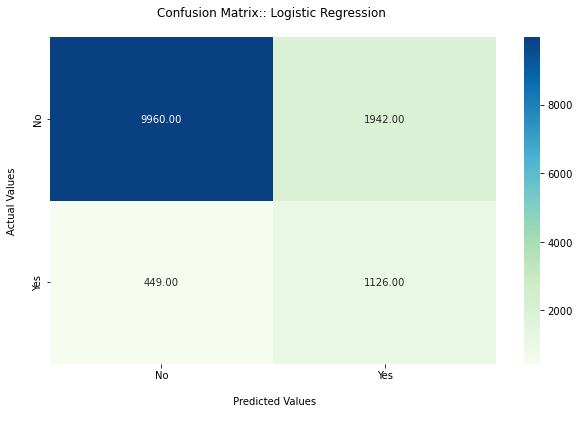

In [209]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,logis_pred), annot=True, fmt=".2f",cmap="GnBu")
fx.set_title('Confusion Matrix:: Logistic Regression \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['No','Yes'])
fx.yaxis.set_ticklabels(['No','Yes'])
plt.show()

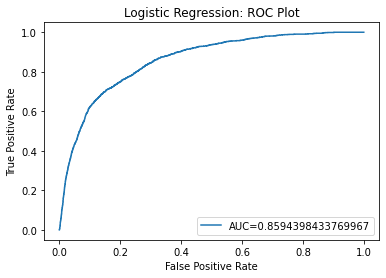

In [210]:
#define metrics
y_pred_proba = logit_reg.predict_proba(X_test[X_train_fs_lg.columns])[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('Logistic Regression: ROC Plot')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Decision Tree

In [211]:
from sklearn.tree import DecisionTreeClassifier,plot_tree

In [212]:
sfs_md_dt = SFS(DecisionTreeClassifier(random_state=369),
          k_features=(5,10),
          forward=True,
          floating=True,
          scoring = 'accuracy',
          cv = 5)

In [213]:
sfs_md_dt.fit(X_train_res,y_train_res)

SequentialFeatureSelector(estimator=DecisionTreeClassifier(random_state=369),
                          floating=True, k_features=(5, 10),
                          scoring='accuracy')

In [214]:
sfs_md_dt.k_feature_names_

('balance',
 'housing',
 'loan',
 'day',
 'month',
 'duration',
 'pdays',
 'job_blue-collar',
 'job_technician',
 'contact_unknown')

In [216]:
pd.DataFrame.from_dict(sfs_md_dt.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(8,)","[0.7248154981549816, 0.712730627306273, 0.7218...",0.720498,"(duration,)",0.005418,0.004215,0.002108
2,"(4, 8)","[0.7709409594095941, 0.8059040590405904, 0.805...",0.799188,"(housing, duration)",0.018339,0.014268,0.007134
3,"(4, 8, 25)","[0.7876383763837639, 0.8297047970479705, 0.831...",0.822196,"(housing, duration, contact_unknown)",0.022221,0.017289,0.008644
4,"(4, 5, 8, 25)","[0.7936346863468635, 0.8459409594095941, 0.845...",0.83572,"(housing, loan, duration, contact_unknown)",0.027077,0.021067,0.010533
5,"(4, 5, 8, 12, 25)","[0.7928044280442804, 0.8516605166051661, 0.852...",0.839649,"(housing, loan, duration, job_blue-collar, con...",0.030145,0.023454,0.011727
6,"(4, 5, 8, 12, 20, 25)","[0.784040590405904, 0.8610701107011071, 0.8594...",0.844354,"(housing, loan, duration, job_blue-collar, job...",0.038787,0.030177,0.015089
7,"(3, 4, 5, 8, 12, 20, 25)","[0.808579335793358, 0.86190036900369, 0.855350...",0.848192,"(balance, housing, loan, duration, job_blue-co...",0.025666,0.019969,0.009985
8,"(3, 4, 5, 8, 10, 12, 20, 25)","[0.8273985239852398, 0.8801660516605166, 0.878...",0.869779,"(balance, housing, loan, duration, pdays, job_...",0.027498,0.021394,0.010697
9,"(3, 4, 5, 7, 8, 10, 12, 20, 25)","[0.8291512915129151, 0.8993542435424354, 0.897...",0.884557,"(balance, housing, loan, month, duration, pday...",0.035619,0.027713,0.013857
10,"(3, 4, 5, 6, 7, 8, 10, 12, 20, 25)","[0.8334870848708487, 0.9118081180811808, 0.909...",0.895443,"(balance, housing, loan, day, month, duration,...",0.039831,0.03099,0.015495


In [217]:
X_train_fs_dt = training_fs_data(sfs_md_dt.k_feature_names_)

In [218]:
# X_train_fs_dt = X_train_res[X_train[list(sfs_md_dt.k_feature_names_)].columns]

In [219]:
dt_model = DecisionTreeClassifier(criterion = 'entropy',max_depth=4,max_features=4,min_samples_split=2,min_samples_leaf=2)
dt_model.fit(X_train_fs_dt,y_train_res)

DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=4,
                       min_samples_leaf=2)

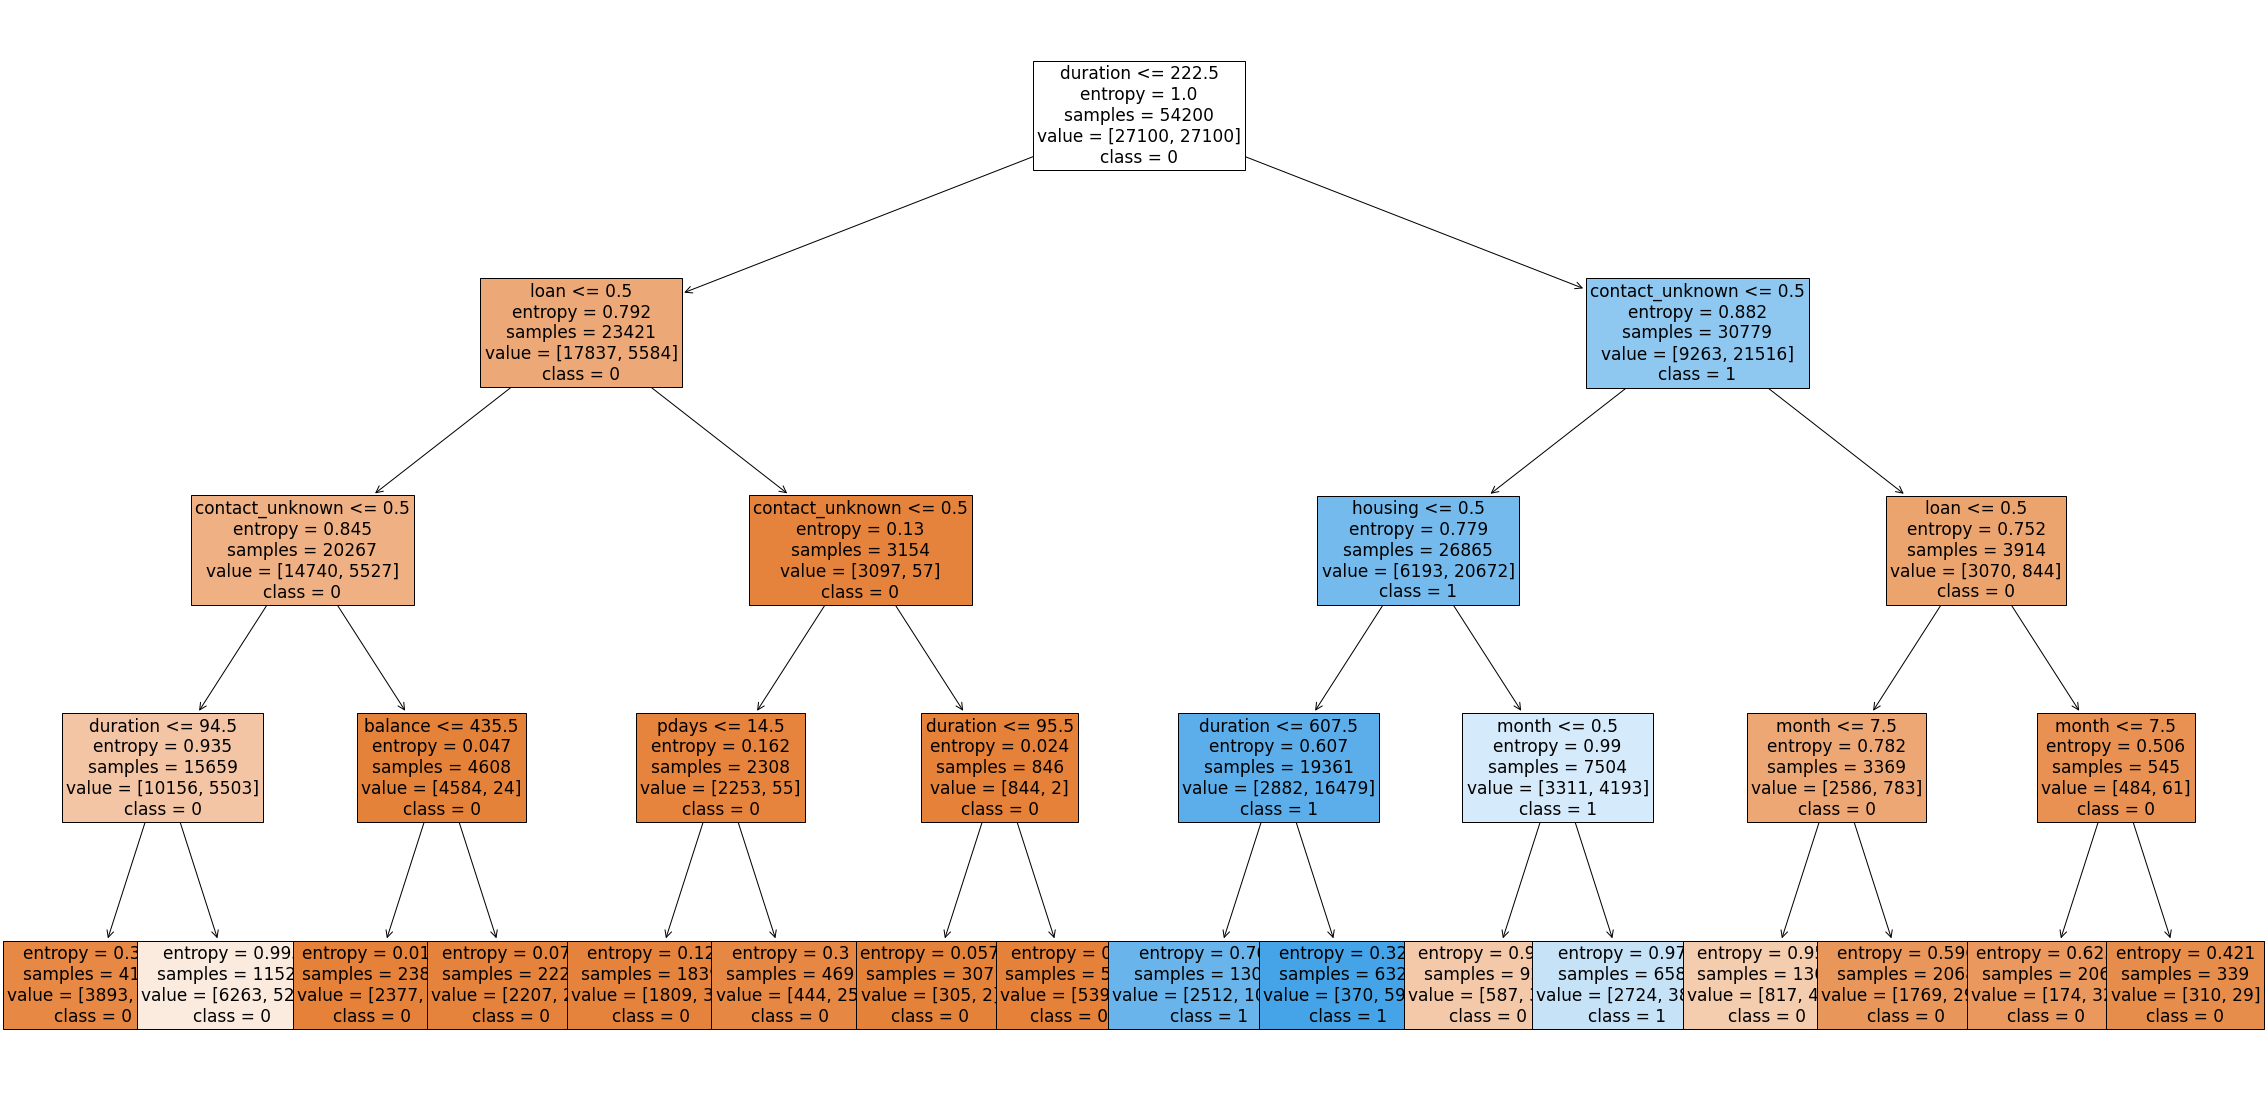

In [220]:
# %matplotlib qt
%matplotlib inline
plt.figure(figsize=(40,20))
tree_plot = plot_tree(dt_model,feature_names=X_train_fs_dt.columns.values.tolist(),class_names=['0','1'],filled=True,fontsize=17)

In [221]:
dt_param_grid = {'criterion':['gini','entropy'],
                'max_depth':range(1,10),
                'max_features':range(1,10),
                'min_samples_split':range(2,10),
                'min_samples_leaf':range(1,5)}

In [222]:
dt_grid_cv = GridSearchCV(DecisionTreeClassifier(),param_grid=dt_param_grid,cv=5,verbose=1,n_jobs=-1)

In [223]:
start = time.time()
dt_grid_cv.fit(X_train_fs_dt,y_train_res)
end = time.time()
print('Time taken:',end - start)

Fitting 5 folds for each of 5184 candidates, totalling 25920 fits
Time taken: 261.41532945632935


In [182]:
print("Best Estimator:",dt_grid_cv.best_estimator_,"Best Params:",dt_grid_cv.best_params_,"Best Score:",dt_grid_cv.best_score_)

Best Estimator: DecisionTreeClassifier(criterion='entropy', max_depth=9, max_features=4,
                       min_samples_leaf=3, min_samples_split=9) Best Params: {'criterion': 'entropy', 'max_depth': 9, 'max_features': 4, 'min_samples_leaf': 3, 'min_samples_split': 9} Best Score: 0.7728604649362922


In [224]:
pred_dt = dt_grid_cv.predict(X_test[X_train_fs_dt.columns])

In [225]:
print('Confusion Matrix::Decision Tree')
print('\n')
print(confusion_matrix(y_test,pred_dt))
print('\n')
print('Classification Report::')
print('\n')
print(classification_report(y_test,pred_dt))

Confusion Matrix::Decision Tree


[[9993 1909]
 [ 391 1184]]


Classification Report::


              precision    recall  f1-score   support

           0       0.96      0.84      0.90     11902
           1       0.38      0.75      0.51      1575

    accuracy                           0.83     13477
   macro avg       0.67      0.80      0.70     13477
weighted avg       0.89      0.83      0.85     13477



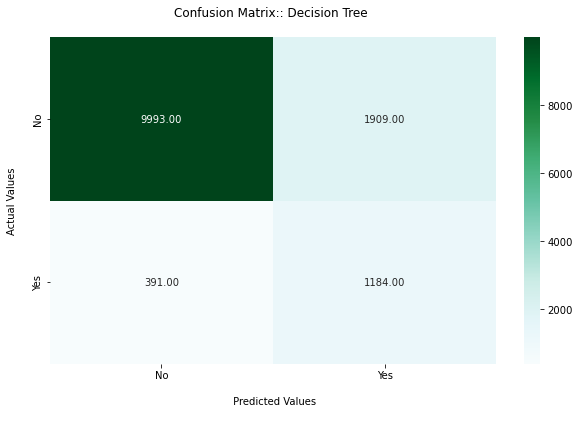

In [226]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,pred_dt), annot=True, fmt=".2f",cmap="BuGn")
fx.set_title('Confusion Matrix:: Decision Tree \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['No','Yes'])
fx.yaxis.set_ticklabels(['No','Yes'])
plt.show()

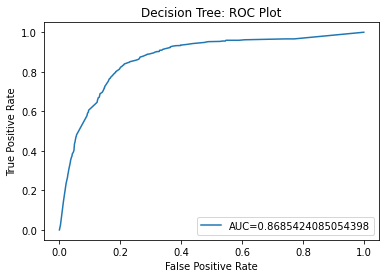

In [228]:
#define metrics
y_pred_proba = dt_grid_cv.predict_proba(X_test[X_train_fs_dt.columns])[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('Decision Tree: ROC Plot')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Random Forest

In [83]:
sfs_md_rf = SFS(RandomForestClassifier(random_state=369),
          k_features=(5,10),
          forward=True,
          floating=True,
          scoring = 'accuracy',
          cv = 5)

In [84]:
sfs_md_rf.fit(X_train_res,y_train_res)

SequentialFeatureSelector(estimator=RandomForestClassifier(random_state=369),
                          floating=True, k_features=(5, 10),
                          scoring='accuracy')

In [85]:
sfs_md_rf.k_feature_names_

('age',
 'balance',
 'housing',
 'day',
 'month',
 'duration',
 'pdays',
 'previous',
 'job_housemaid',
 'contact_unknown')

In [86]:
pd.DataFrame.from_dict(sfs_md_rf.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(8,)","[0.7261070110701107, 0.713929889298893, 0.7232...",0.721697,"(duration,)",0.005327,0.004144,0.002072
2,"(4, 8)","[0.7754612546125461, 0.8080258302583025, 0.806...",0.801697,"(housing, duration)",0.017041,0.013259,0.006629
3,"(3, 4, 8)","[0.8151291512915129, 0.8395756457564576, 0.834...",0.832915,"(balance, housing, duration)",0.011653,0.009067,0.004533
4,"(3, 4, 8, 10)","[0.8482472324723247, 0.8790590405904058, 0.878...",0.87214,"(balance, housing, duration, pdays)",0.015404,0.011985,0.005992
5,"(3, 4, 7, 8, 10)","[0.8659594095940959, 0.9023985239852399, 0.900...",0.893266,"(balance, housing, month, duration, pdays)",0.017778,0.013832,0.006916
6,"(3, 4, 6, 7, 8, 10)","[0.8754612546125461, 0.9206642066420664, 0.917...",0.911937,"(balance, housing, day, month, duration, pdays)",0.023632,0.018387,0.009193
7,"(3, 4, 6, 7, 8, 10, 25)","[0.877029520295203, 0.9317343173431735, 0.9273...",0.920221,"(balance, housing, day, month, duration, pdays...",0.027896,0.021704,0.010852
8,"(0, 3, 4, 6, 7, 8, 10, 25)","[0.881549815498155, 0.9369926199261993, 0.9306...",0.924576,"(age, balance, housing, day, month, duration, ...",0.027827,0.02165,0.010825
9,"(0, 3, 4, 6, 7, 8, 10, 14, 25)","[0.8804428044280442, 0.9374538745387454, 0.932...",0.925129,"(age, balance, housing, day, month, duration, ...",0.028848,0.022445,0.011222
10,"(0, 3, 4, 6, 7, 8, 10, 11, 14, 25)","[0.881549815498155, 0.9375461254612546, 0.9334...",0.925369,"(age, balance, housing, day, month, duration, ...",0.028233,0.021966,0.010983


In [88]:
X_train_fs_rf = training_fs_data(sfs_md_rf.k_feature_names_)

In [89]:
# X_train_fs_rf = X_train_res[X_train[list(sfs_md_rf.k_feature_names_)].columns]

In [90]:
rf_param_grid = {'n_estimators':[50,100],
                'max_depth':range(1,10),
                'max_features':range(1,10),
                'min_samples_split':range(2,10),
                'min_samples_leaf':range(1,5)}

In [91]:
rf_grid_cv = GridSearchCV(RandomForestClassifier(),param_grid=rf_param_grid,cv=5,verbose=1,n_jobs=-1)

In [ ]:
start = time.time()
rf_grid_cv.fit(X_train_fs_rf,y_train_res)
end = time.time()
print('Time taken:',end - start)

Fitting 5 folds for each of 5184 candidates, totalling 25920 fits


In [78]:
print("Best Estimator:",rf_grid_cv.best_estimator_,"Best Params:",rf_grid_cv.best_params_,"Best Score:",rf_grid_cv.best_score_)


Best Estimator: RandomForestClassifier(max_depth=9, max_features=7, min_samples_leaf=2,
                       min_samples_split=3) Best Params: {'max_depth': 9, 'max_features': 7, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 100} Best Score: 0.8761232616649849


In [81]:
pred_rf = rf_grid_cv.predict(X_test[X_train_fs_rf.columns])

In [82]:
print('Confusion Matrix:: Random Forest')
print('\n')
print(confusion_matrix(y_test,pred_rf))
print('\n')
print('Classification Report::')
print('\n')
print(classification_report(y_test,pred_rf))

Confusion Matrix:: Random Forest


[[10069  1833]
 [  352  1223]]


Classification Report::


              precision    recall  f1-score   support

           0       0.97      0.85      0.90     11902
           1       0.40      0.78      0.53      1575

    accuracy                           0.84     13477
   macro avg       0.68      0.81      0.72     13477
weighted avg       0.90      0.84      0.86     13477



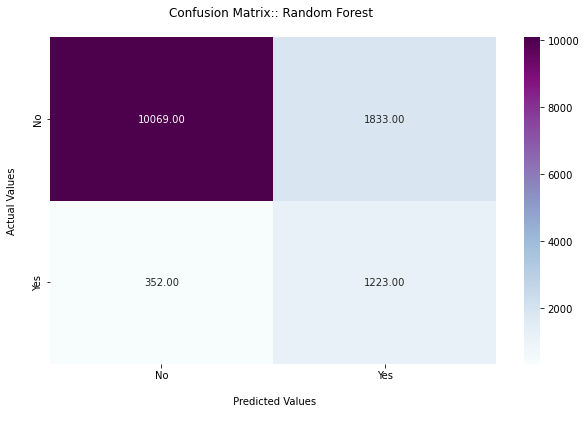

In [83]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,pred_rf), annot=True, fmt=".2f",cmap="BuPu")
fx.set_title('Confusion Matrix:: Random Forest \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['No','Yes'])
fx.yaxis.set_ticklabels(['No','Yes'])
plt.show()

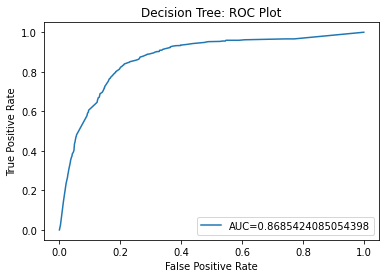

In [228]:
#define metrics
y_pred_proba = rf_grid_cv.predict_proba(X_test[X_train_fs_rf.columns])[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('Random Forest: ROC Plot')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

# Gradient Boosting

In [229]:
from xgboost import XGBClassifier

In [230]:
sfs_md_gb = SFS(XGBClassifier(random_state=369),
          k_features=(5,10),
          forward=True,
          floating=True,
          scoring = 'accuracy',
          cv = 5)

In [231]:
sfs_md_gb.fit(X_train_res,y_train_res)

SequentialFeatureSelector(estimator=XGBClassifier(base_score=None, booster=None,
                                                  callbacks=None,
                                                  colsample_bylevel=None,
                                                  colsample_bynode=None,
                                                  colsample_bytree=None,
                                                  early_stopping_rounds=None,
                                                  enable_categorical=False,
                                                  eval_metric=None,
                                                  feature_types=None,
                                                  gamma=None, gpu_id=None,
                                                  grow_policy=None,
                                                  importance_type=None,
                                                  interaction_constraints=None,
                                                  learning_rate=None,
                                                  max_bin=None,
                                                  max_cat_threshold=None,
                                                  max_cat_to_onehot=None,
                                                  max_delta_step=None,
                                                  max_depth=None,
                                                  max_leaves=None,
                                                  min_child_weight=None,
                                                  missing=nan,
                                                  monotone_constraints=None,
                                                  n_estimators=100, n_jobs=None,
                                                  num_parallel_tree=None,
                                                  predictor=None,
                                                  random_state=369, ...),
                          floating=True, k_features=(5, 10),
                          scoring='accuracy')

In [232]:
sfs_md_gb.k_feature_names_

('age',
 'balance',
 'housing',
 'loan',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'contact_unknown')

In [233]:
pd.DataFrame.from_dict(sfs_md_gb.get_metric_dict()).T

,feature_idx,cv_scores,avg_score,feature_names,ci_bound,std_dev,std_err
1,"(8,)","[0.7281365313653136, 0.720110701107011, 0.7285...",0.725849,"(duration,)",0.0039,0.003035,0.001517
2,"(4, 8)","[0.7850553505535055, 0.8155904059040591, 0.813...",0.809594,"(housing, duration)",0.015863,0.012342,0.006171
3,"(3, 4, 8)","[0.8048892988929889, 0.8404059040590406, 0.837...",0.832601,"(balance, housing, duration)",0.017947,0.013963,0.006982
4,"(3, 4, 8, 10)","[0.8296125461254612, 0.8605166051660517, 0.862...",0.857399,"(balance, housing, duration, pdays)",0.018174,0.01414,0.00707
5,"(3, 4, 7, 8, 10)","[0.8470479704797048, 0.8797970479704798, 0.877...",0.874668,"(balance, housing, month, duration, pdays)",0.018068,0.014057,0.007029
6,"(3, 4, 6, 7, 8, 10)","[0.8505535055350554, 0.9072878228782287, 0.904...",0.895941,"(balance, housing, day, month, duration, pdays)",0.029214,0.02273,0.011365
7,"(3, 4, 6, 7, 8, 10, 25)","[0.8606088560885609, 0.9208487084870849, 0.917...",0.908192,"(balance, housing, day, month, duration, pdays...",0.030627,0.023829,0.011914
8,"(3, 4, 6, 7, 8, 9, 10, 25)","[0.8605166051660517, 0.9263837638376384, 0.921...",0.912417,"(balance, housing, day, month, duration, campa...",0.033458,0.026031,0.013016
9,"(0, 3, 4, 6, 7, 8, 9, 10, 25)","[0.861439114391144, 0.9304428044280443, 0.9249...",0.915258,"(age, balance, housing, day, month, duration, ...",0.034689,0.026989,0.013495
10,"(0, 3, 4, 5, 6, 7, 8, 9, 10, 25)","[0.8547970479704797, 0.933210332103321, 0.9279...",0.916863,"(age, balance, housing, loan, day, month, dura...",0.039998,0.03112,0.01556


In [234]:
X_train_fs_gb = training_fs_data(sfs_md_gb.k_feature_names_)

In [235]:
# X_train_fs_gb = X_train_res[X_train[list(sfs_md_gb.k_feature_names_)].columns]

In [236]:
gb_param_grid = {'n_estimators':[50,100],
                 'max_depth':range(1,10),
                 'learning_rate':[0.01,0.05,0.1],
                  'subsample': [i/10.0 for i in range(1, 3)],
                  'colsample_bytree':[i/10.0 for i in range(1, 3)],
                  'gamma':[i/10.0 for i in range(3)]}

In [237]:
gb_grid_cv = GridSearchCV(XGBClassifier(objective='binary:logistic',nthread=4,seed=369),param_grid=gb_param_grid,cv=5,verbose=1,n_jobs=-1)

In [238]:
start = time.time()
gb_grid_cv.fit(X_train_fs_gb,y_train_res)
end = time.time()
print('Time taken:',end - start)

Fitting 5 folds for each of 648 candidates, totalling 3240 fits
Time taken: 943.4725430011749


In [239]:
print("Best Estimator:",gb_grid_cv.best_estimator_,"Best Params:",gb_grid_cv.best_params_,"Best Score:",gb_grid_cv.best_score_)

Best Estimator: XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=0.2,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.1, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=9, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=4, nthread=4,
              num_parallel_tree=1, predictor='auto', ...) Best Params: {'colsample_bytree': 0.2, 'gamma': 0.1, 'learning_rate': 0.1, 'max_depth': 9, 'n_estimators': 100, 'subsample': 0.2} Best Score: 0.8973247232472324


In [240]:
pred_gb = gb_grid_cv.predict(X_test[X_train_fs_gb.columns])

In [241]:
print('Confusion Matrix::XGBoost')
print('\n')
print(confusion_matrix(y_test,pred_gb))
print('\n')
print('Classification Report::')
print('\n')
print(classification_report(y_test,pred_gb))

Confusion Matrix::XGBoost


[[10411  1491]
 [  403  1172]]


Classification Report::


              precision    recall  f1-score   support

           0       0.96      0.87      0.92     11902
           1       0.44      0.74      0.55      1575

    accuracy                           0.86     13477
   macro avg       0.70      0.81      0.73     13477
weighted avg       0.90      0.86      0.87     13477



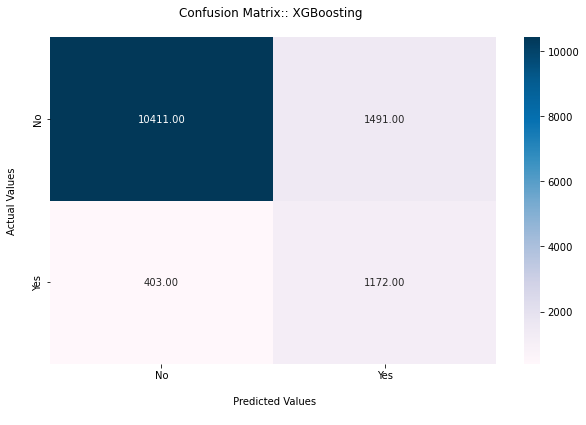

In [242]:
plt.figure(figsize=(10,6))
fx=sns.heatmap(confusion_matrix(y_test,pred_gb), annot=True, fmt=".2f",cmap="PuBu")
fx.set_title('Confusion Matrix:: XGBoosting \n');
fx.set_xlabel('\n Predicted Values\n')
fx.set_ylabel('Actual Values\n');
fx.xaxis.set_ticklabels(['No','Yes'])
fx.yaxis.set_ticklabels(['No','Yes'])
plt.show()

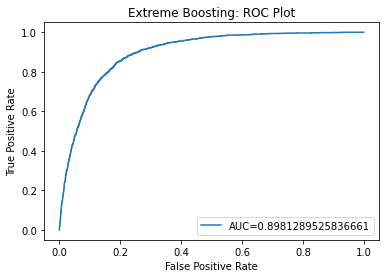

In [243]:
#define metrics
y_pred_proba = gb_grid_cv.predict_proba(X_test[X_train_fs_gb.columns])[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.title('Extreme Boosting: ROC Plot')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()